<a href="https://colab.research.google.com/github/rafaelchourio/Deep-Learning-for-CV-Starter/blob/master/minivggnet_cifar10_lr_decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np
from importlib.machinery import SourceFileLoader
somemodule=SourceFileLoader("minivggnet","/content/drive/My Drive/Colab Notebooks/Workspace/nn/convolutionals/minivggnet.py").load_module()
from minivggnet import MiniVGGNet

In [0]:
def step_decay(epoch):
  # initialize the base initial learning rate, drop factor, and
  # epochs to drop every
  initAlpha = 0.01
  factor = 0.5
  dropEvery = 5

  # compute learning rate for the current epoch
  alpha = initAlpha * (factor ** np.floor((1 + epoch) / dropEvery))

  # return the learning rate
  return float(alpha)

In [3]:
# load the training and testing data, then scale it into the range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] loading CIFAR-10 data...


In [0]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [0]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

In [0]:
# define the set of callbacks to be passed to the model during
# training
callbacks = [LearningRateScheduler(step_decay)]

In [9]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

[INFO] compiling model...


In [10]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=64, epochs=40, callbacks=callbacks, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 22s 439us/step - loss: 1.6589 - accuracy: 0.4502 - val_loss: 1.4248 - val_accuracy: 0.5215
Epoch 2/40
50000/50000 [==============================] - 20s 395us/step - loss: 1.1684 - accuracy: 0.5989 - val_loss: 0.9353 - val_accuracy: 0.6785
Epoch 3/40
50000/50000 [==============================] - 20s 398us/step - loss: 0.9859 - accuracy: 0.6586 - val_loss: 0.8645 - val_accuracy: 0.7023
Epoch 4/40
50000/50000 [==============================] - 20s 396us/step - loss: 0.8702 - accuracy: 0.6982 - val_loss: 0.8347 - val_accuracy: 0.7042
Epoch 5/40
50000/50000 [==============================] - 20s 397us/step - loss: 0.7321 - accuracy: 0.7425 - val_loss: 0.6832 - val_accuracy: 0.7607
Epoch 6/40
50000/50000 [==============================] - 20s 397us/step - loss: 0.6813 - accuracy: 0.7618 - val_loss: 0.6400 - val_accuracy: 0.7751
Epoch 7/40
50000/50000 [=====

In [11]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.83      0.81      0.82      1000
  automobile       0.91      0.89      0.90      1000
        bird       0.74      0.65      0.69      1000
         cat       0.65      0.62      0.63      1000
        deer       0.74      0.80      0.77      1000
         dog       0.70      0.71      0.70      1000
        frog       0.81      0.89      0.85      1000
       horse       0.86      0.84      0.85      1000
        ship       0.87      0.91      0.89      1000
       truck       0.86      0.88      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



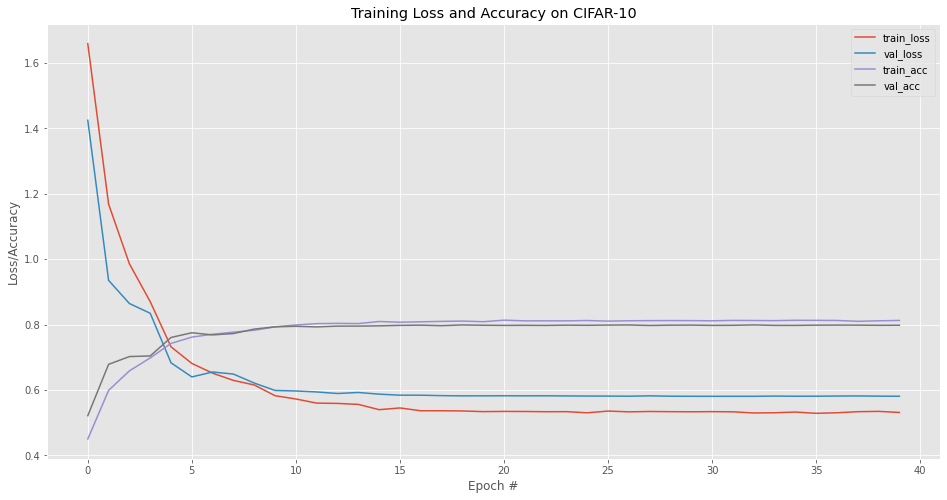

In [13]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["output"])